In [37]:
import pandas as pd
import urllib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import os
import numpy as np
from operator import itemgetter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
# requirements : 
#     recommended platform : ubuntu
#     python == 3.7
#     pip install pandas
#     pip install numpy
#     pip install sklearn
#     pip install seaborn
#     pip install matplotlib
%matplotlib inline


**Why import os?**

This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module. For creating temporary files and directories see the tempfile module, and for high-level file and directory handling see the shutil module.

# DATASET
Data Source
    
    https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation
    
    Source:
    Rajen Bhatt, Abhinav Dhall, rajen.bhatt '@' gmail.com, IIT Delhi.
    
    Data Set Information:

        The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.
        
    Attribute Information:

        This dataset is of the dimension 245057 * 4 where first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y).
        
    Relevant Papers:


1. Rajen B. Bhatt, Gaurav Sharma, Abhinav Dhall, Santanu Chaudhury, â€œEfficient skin region segmentation using low complexity fuzzy decision tree modelâ€, IEEE-INDICON 2009, Dec 16-18, Ahmedabad, India, pp. 1-4.
        2. Abhinav Dhall, Gaurav Sharma, Rajen Bhatt, Ghulam Mohiuddin Khan, â€œAdaptive Digital Makeupâ€, in Proc. of International Symposium on Visual Computing (ISVC) 2009, Nov. 30 â€“ Dec. 02, Las Vegas, Nevada, USA, Lecture Notes in Computer Science, Vol. 5876, pp. 728-736.



        Citation Request:

        Rajen Bhatt, Abhinav Dhall, 'Skin Segmentation Dataset', UCI Machine Learning Repository




### DOWNLOAD DATASET
    Direct Link : https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

#### DOWNLOAD USING PYTHON

In [38]:
if not os.path.exists('./Skin_NonSkin.txt'):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
    urllib.request.urlretrieve(url,'./Skin_NonSkin.txt')

#### Read using pandas

In [39]:
df = pd.read_csv('Skin_NonSkin.txt', sep='\t',names =['B','G','R','skin'])
df.head()

,B,G,R,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check Missing values

**dataframe.isna()**

Pandas dataframe.isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings ” or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

### Standardize dataset

**Why Standardize?**

It is another integral preprocessing step.In Standardization we transform our values such that the mean of the values is 0 and the standard deviation is 1. So in simple terms we just calculate the mean and standard deviation of the values and then for each data point we just subtract the mean and divide it by standard deviation.
Which algorithms? (YES: Regression and Classification problems, NO: Trees) Linear Regression (convergence in GD will happen more quickly, allows random initialized coefficients to be closer to global minimum).; wherever Gradient Descent employed; k means clustering (Euclid dist), k nearest neighbor (Euclid dist); not necessary for Decision Trees, Random Forest, Xgboost

**How?**

1. Subtract Mean (Zero Out): mu = 1/m summation vector x from i to m and x:= x - mu for every training sample (so just moved training sample until has zero mean)
2. Normalize the variances: a vector sigma^2 = 1/m summation vector x **2 element-wise squaring from i to m   and x /= sigma^2 for each 

z-score: a measure of how many std dev an observation is away from mean
Z = (X - mu)/sigma

from normal dist X ---> Z stardard normal random variable

In [40]:
df.skin.unique()

array([1, 2])

In [41]:
feature = df[df.columns[~df.columns.isin(['skin'])]] #Except Label
label = (df[['skin']] == 1)*1 #Converting to 0 and 1 (this col has values 1 and 2) if value =1, then True, else false =0. Example of code golf; trying to achieve shortest length of code possible.
feature = feature / 255. #Pixel values range from 0-255 converting between 0-1

In [42]:
print (label)

        skin
0          1
1          1
2          1
3          1
4          1
...      ...
245052     0
245053     0
245054     0
245055     0
245056     0

[245057 rows x 1 columns]


In [43]:
#golfless = (df[['skin']] == 1)
#golfless = golfless.astype(int)
#print(golfless)


In [44]:
#df['skin'].replace([1,2],[1,0],inplace=True)
#df.skin.unique()

In [45]:
feature.head()

,B,G,R
0,0.290196,0.333333,0.482353
1,0.286275,0.329412,0.478431
2,0.282353,0.325490,0.474510
3,0.274510,0.317647,0.466667
4,0.274510,0.317647,0.466667


In [46]:
label.head()

,skin
0,1
1,1
2,1
3,1
4,1


### Explore your data
    Please try to understand the nature of data
    

In [47]:
alldf = pd.concat([feature,label], sort=True, axis=1)
alldf

,B,G,R,skin
0,0.290196,0.333333,0.482353,1
1,0.286275,0.329412,0.478431,1
2,0.282353,0.325490,0.474510,1
3,0.274510,0.317647,0.466667,1
4,0.274510,0.317647,0.466667,1
...,...,...,...,...
245052,0.639216,0.635294,0.439216,0
245053,0.639216,0.635294,0.439216,0
245054,0.639216,0.635294,0.439216,0
245055,0.639216,0.635294,0.439216,0


Pandas sample() is used to generate a sample random row or column from the function caller data frame.

In [48]:
sample = alldf.sample(1000)

In [49]:
onlybgr = sample[sample.columns[~sample.columns.isin(['skin'])]]


Seaborn pairplot()
Plot pairwise relationships in a dataset. The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

hue: Variable in data to map plot aspects to different colors; coloring the figures based on a categorical variable
kind: Kind of plot for the non-identity relationships {scatter, reg} add scatter or regression

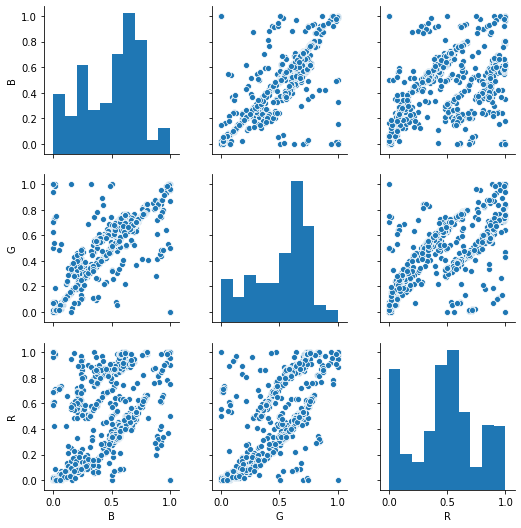

In [50]:
sns.pairplot(onlybgr)

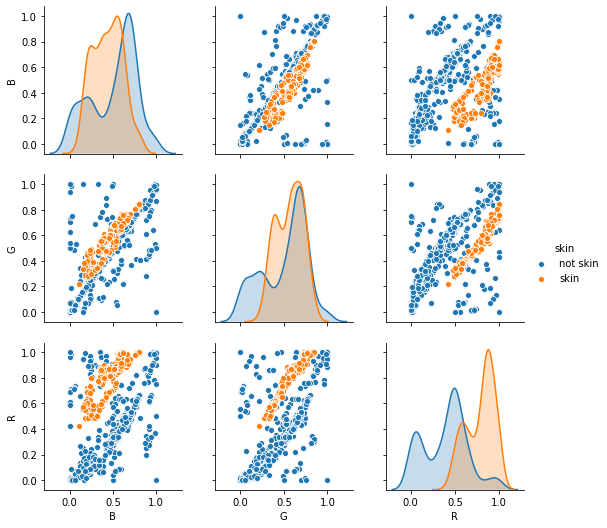

In [51]:
sample_ = sample.copy()
sample_['skin'] = sample.skin.apply(lambda x:{1:'skin',0:'not skin'}.get(x))
sns.pairplot(sample_, hue="skin")
# sample

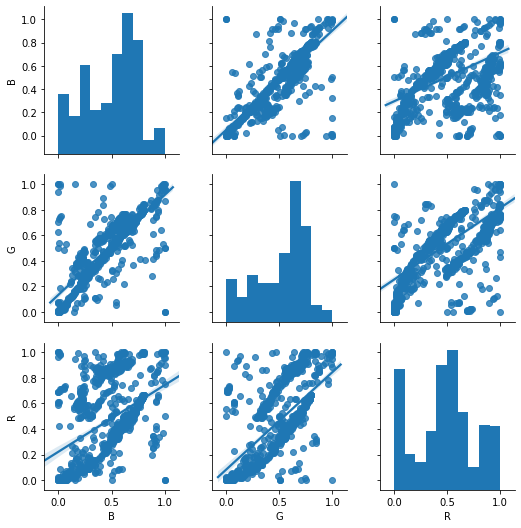

In [52]:
sns.pairplot(onlybgr, kind="reg")

In [53]:
# Lets see how many 0s and 1s
(label == 0).skin.sum(),(label == 1).skin.sum()

(194198, 50859)

*Cross Validation?**

A resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

## SPLIT DATA INTO 5 CROSS - VALIDATION
cross validation to avoid overfitting

It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test

In [54]:
x = feature.values
y = label.values

Scikit train_test_split(): split dataset into training and datset randomly.

We split this into two different datasets, one for the independent features — x, and one for the dependent variable — y (which is the last column). We’ll now split the dataset x into two separate sets — xTrain and xTest. Similarly, we’ll split the dataset y into two sets as well — yTrain and yTest. Doing this using the sklearn library is very simple. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
test_size = 20% then train_set=80%
random_state = if non-zero ensure reproducibility; an guarantee that the output of Run 1 will be equal to the output of Run 2. Used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [55]:
# We will keep fix test and take 5 cross validation set
# so we will have five different data set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [56]:
#Lets see the size of xtrain, xtest
len(xtrain),len(xtest)

(196045, 49012)

In [57]:
# 5 Fold Split
# First merge xtrain and ytrain so that we can easily divide into 5 chunks

data = np.concatenate([xtrain,ytrain],axis = 1)
# Observe the shape of array
xtrain.shape,ytrain.shape,data.shape

((196045, 3), (196045, 1), (196045, 4))

In [58]:
# Divide our data to 5 chunks
chunks = np.split(data,5)

In [59]:
datadict = {'fold1':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold2':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold3':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}}, 
            'fold4':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold5':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},}

In [60]:
for i in range(5):
    datadict['fold'+str(i+1)]['val']['x'] = chunks[i][:,0:3]
    datadict['fold'+str(i+1)]['val']['y'] = chunks[i][:,3:4]
    
    idx = list(set(range(5))-set([i]))
    X = np.concatenate(itemgetter(*idx)(chunks),0)
    datadict['fold'+str(i+1)]['train']['x'] = X[:,0:3]
    datadict['fold'+str(i+1)]['train']['y'] = X[:,3:4]
    

In [61]:
def writepickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def readpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [62]:
writepickle(datadict,'data.pkl')

In [63]:
writepickle(datadict,'data.pkl')

## Now You Can Read This Pickle File And Use In Your Project

In [64]:
data = readpickle('data.pkl')

## How to access data
    Example : Access fold1 data

In [65]:
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']

xtrain, ytrain = fold1_train['x'],fold1_train['y']
xval, yval = fold1_val['x'], fold1_val['y']
xtest, ytest = fold1_test['x'],fold1_test['y']

In [66]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [67]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [68]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

<h1 style="color:green">!!!!!!!!!! NOTES !!!!!!!!!!</h1>

    This walkthrough is just to make your life easier
    If you want to use your own ways of doing data processing it is fine
    You can continue your assignment right-away from below or setup 
    a project like assignment 1. You can use any library you want
    

# Fit Model on Training Set 1

In [69]:
LogReg = LogisticRegression()
LogReg = LogReg.fit(xtest, ytest)
print(LogReg.score(xtest, ytest))

0.9181628988819065


/Users/faust/.conda/envs/assignment_2_logistic_regression/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faust/.conda/envs/assignment_2_logistic_regression/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:

for i in range(5):
    
    fold = data['fold'+str(i+1)]
    fold_train = fold['train']
    fold_val = fold['val']
    fold_test = fold['test']

    xtrain, ytrain = fold_train['x'],fold_train['y']
    xval, yval = fold_val['x'], fold_val['y']
    xtest, ytest = fold_test['x'],fold_test['y']
    
    xtrain.shape, ytrain.shape
    xval.shape, yval.shape
    xtest.shape,ytest.shape
    
    LogReg = LogisticRegression()
    LogReg_Val = LogReg.fit(xval, yval)
    LogReg_Val_Score = LogReg_Val.score(xval, yval)
    
    LogReg = LogisticRegression()
    LogReg_Test = LogReg.fit(xtest, ytest)
    LogReg_Test_Score = LogReg_Test.score(xtest, ytest)
    
    print(f'{LogReg_Val_Score} | {LogReg_Test_Score}')


/Users/faust/.conda/envs/assignment_2_logistic_regression/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faust/.conda/envs/assignment_2_logistic_regression/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faust/.conda/envs/assignment_2_logistic_regression/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faust/.conda/envs/assignment_2_logistic_regression/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was exp

0.9186921370093601 | 0.9181628988819065
0.9180035196000919 | 0.9181628988819065
0.9210385370705705 | 0.9181628988819065
0.9172383891453493 | 0.9181628988819065
0.9192022239791885 | 0.9181628988819065
